In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px
%matplotlib inline
import functools as f
import plotly.graph_objects as go
import missingno as msno
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

<ipython-input-1-f014a1920623>:11: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
<ipython-input-1-f014a1920623>:12: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [2]:
df = pd.read_csv('Meteorite_Landings.csv')

<AxesSubplot:>

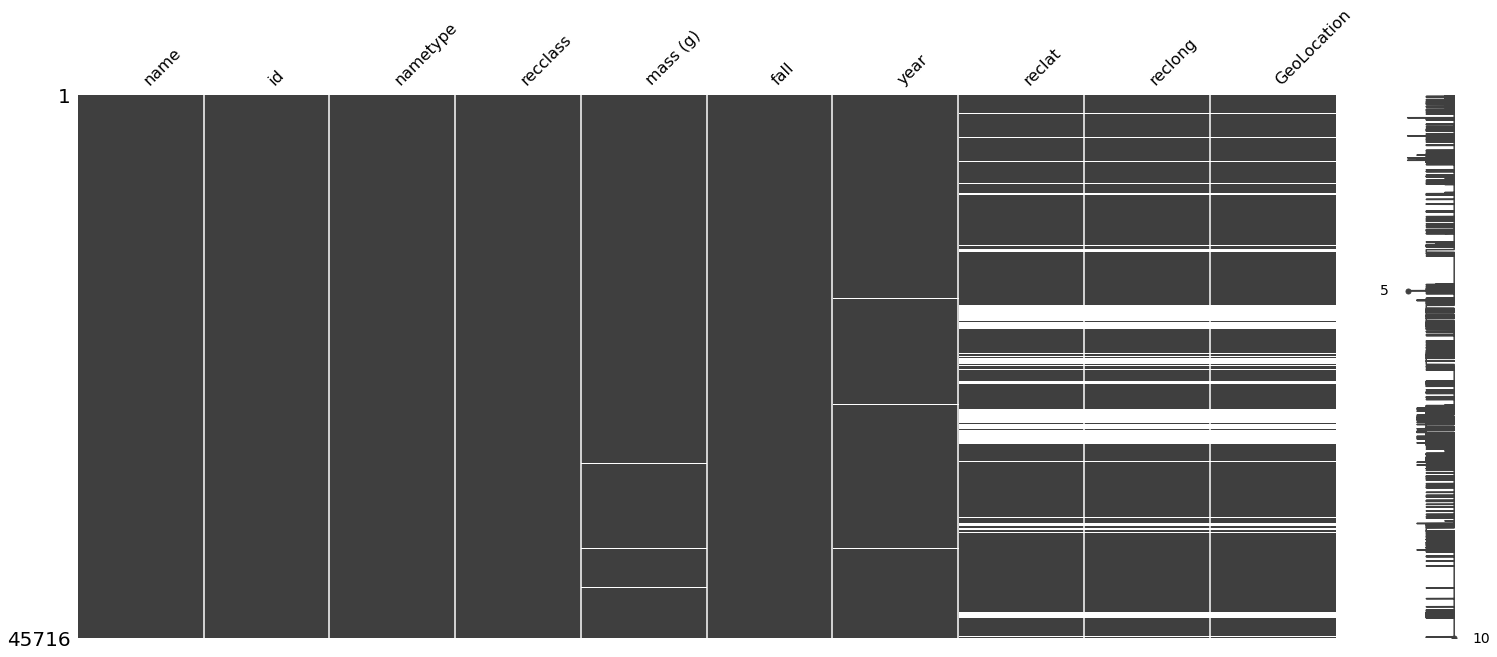

In [3]:
# Visualize missing values as a matrix
msno.matrix(df)

In [4]:
df.dropna()

name     id nametype              recclass  mass (g)   fall  \
0          Aachen      1    Valid                    L5      21.0   Fell   
1          Aarhus      2    Valid                    H6     720.0   Fell   
2            Abee      6    Valid                   EH4  107000.0   Fell   
3        Acapulco     10    Valid           Acapulcoite    1914.0   Fell   
4         Achiras    370    Valid                    L6     780.0   Fell   
...           ...    ...      ...                   ...       ...    ...   
45711  Zillah 002  31356    Valid               Eucrite     172.0  Found   
45712      Zinder  30409    Valid  Pallasite, ungrouped      46.0  Found   
45713        Zlin  30410    Valid                    H4       3.3  Found   
45714   Zubkovsky  31357    Valid                    L6    2167.0  Found   
45715  Zulu Queen  30414    Valid                  L3.7     200.0  Found   

         year    reclat    reclong             GeoLocation  
0      1880.0  50.77500    6.08333       (50.775, 6.08333)  
1      1951.0  56.18333   10.23333    (56.18333, 10.23333)  
2      1952.0  54.21667 -113.00000      (54.21667, -113.0)  
3      1976.0  16.88333  -99.90000       (16.88333, -99.9)  
4      1902.0 -33.16667  -64.95000     (-33.16667, -64.95)  
...       ...       ...        ...                     ...  
45711  1990.0  29.03700   17.01850       (29.037, 17.0185)  
45712  1999.0  13.78333    8.96667     (13.78333, 8.96667)  
45713  1939.0  49.25000   17.66667       (49.25, 17.66667)  
45714  2003.0  49.78917   41.50460     (49.78917, 41.5046)  
45715  1976.0  33.98333 -115.68333  (33.98333, -115.68333)  

[38115 rows x 10 columns]

In [5]:
df.head()

name   id nametype     recclass  mass (g)  fall    year    reclat  \
0    Aachen    1    Valid           L5      21.0  Fell  1880.0  50.77500   
1    Aarhus    2    Valid           H6     720.0  Fell  1951.0  56.18333   
2      Abee    6    Valid          EH4  107000.0  Fell  1952.0  54.21667   
3  Acapulco   10    Valid  Acapulcoite    1914.0  Fell  1976.0  16.88333   
4   Achiras  370    Valid           L6     780.0  Fell  1902.0 -33.16667   

     reclong           GeoLocation  
0    6.08333     (50.775, 6.08333)  
1   10.23333  (56.18333, 10.23333)  
2 -113.00000    (54.21667, -113.0)  
3  -99.90000     (16.88333, -99.9)  
4  -64.95000   (-33.16667, -64.95)

In [6]:
len(df)

45716

In [7]:
df.describe()

id      mass (g)          year        reclat       reclong
count  45716.000000  4.558500e+04  45425.000000  38401.000000  38401.000000
mean   26889.735104  1.327808e+04   1991.828817    -39.122580     61.074319
std    16860.683030  5.749889e+05     25.052766     46.378511     80.647298
min        1.000000  0.000000e+00    860.000000    -87.366670   -165.433330
25%    12688.750000  7.200000e+00   1987.000000    -76.714240      0.000000
50%    24261.500000  3.260000e+01   1998.000000    -71.500000     35.666670
75%    40656.750000  2.026000e+02   2003.000000      0.000000    157.166670
max    57458.000000  6.000000e+07   2101.000000     81.166670    354.473330

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass (g)     45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45425 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


In [9]:
df.groupby('nametype').count()

name     id  recclass  mass (g)   fall   year  reclat  reclong  \
nametype                                                                    
Relict       75     75        75        26     75     74      70       70   
Valid     45641  45641     45641     45559  45641  45351   38331    38331   

          GeoLocation  
nametype               
Relict             70  
Valid           38331

In [10]:
df.groupby('fall').count()

name     id  nametype  recclass  mass (g)   year  reclat  reclong  \
fall                                                                        
Fell    1107   1107      1107      1107      1075   1107    1097     1097   
Found  44609  44609     44609     44609     44510  44318   37304    37304   

       GeoLocation  
fall                
Fell          1097  
Found        37304

In [11]:
df.groupby('year').count()

name    id  nametype  recclass  mass (g)  fall  reclat  reclong  \
year                                                                      
860.0      1     1         1         1         1     1       1        1   
920.0      1     1         1         1         0     1       1        1   
1399.0     1     1         1         1         1     1       1        1   
1490.0     1     1         1         1         1     1       1        1   
1491.0     1     1         1         1         1     1       1        1   
...      ...   ...       ...       ...       ...   ...     ...      ...   
2010.0  1005  1005      1005      1005      1005  1005    1005     1005   
2011.0   713   713       713       713       713   713     713      713   
2012.0   234   234       234       234       234   234     234      234   
2013.0    11    11        11        11        11    11      11       11   
2101.0     1     1         1         1         1     1       1        1   

        GeoLocation  
year                 
860.0             1  
920.0             1  
1399.0            1  
1490.0            1  
1491.0            1  
...             ...  
2010.0         1005  
2011.0          713  
2012.0          234  
2013.0           11  
2101.0            1  

[265 rows x 9 columns]

C:\Users\Kamen\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='year', ylabel='Density'>

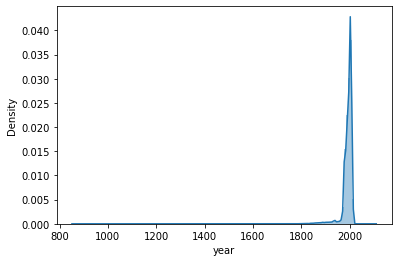

In [12]:
sns.distplot(df['year'], bins = 150)

In [13]:
df['mass (g)'].max()

60000000.0

In [14]:
df.groupby('recclass').count()

name   id  nametype  mass (g)  fall  year  reclat  \
recclass                                                                   
Acapulcoite              54   54        54        54    54    53      38   
Acapulcoite/Lodranite     6    6         6         6     6     6       5   
Acapulcoite/lodranite     3    3         3         3     3     2       2   
Achondrite-prim           9    9         9         9     9     9       3   
Achondrite-ung           57   57        57        57    57    56      37   
...                     ...  ...       ...       ...   ...   ...     ...   
Unknown                   7    7         7         0     7     6       5   
Ureilite                300  300       300       300   300   300     214   
Ureilite-an               4    4         4         4     4     4       3   
Ureilite-pmict           23   23        23        23    23    23      18   
Winonaite                25   25        25        25    25    25      18   

                       reclong  GeoLocation  
recclass                                     
Acapulcoite                 38           38  
Acapulcoite/Lodranite        5            5  
Acapulcoite/lodranite        2            2  
Achondrite-prim              3            3  
Achondrite-ung              37           37  
...                        ...          ...  
Unknown                      5            5  
Ureilite                   214          214  
Ureilite-an                  3            3  
Ureilite-pmict              18           18  
Winonaite                   18           18  

[466 rows x 9 columns]

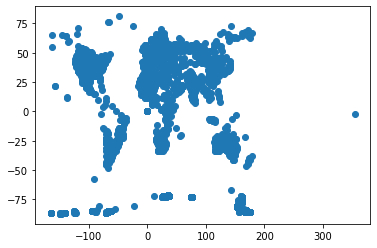

In [15]:
#Let's plot the data in a scatterplot
plt.scatter(x=df['reclong'], y=df['reclat'])
plt.rcParams['figure.figsize'] = (50,35)
plt.show()

In [33]:
#Let's improve the visual
fig = px.scatter_geo(df, lon='reclong', lat='reclat', hover_name='name')
fig.show()

ValueError: 
    Invalid value of type 'builtins.bool' received for the 'fitbounds' property of layout.geo
        Received value: True

    The 'fitbounds' property is an enumeration that may be specified as:
      - One of the following enumeration values:
            [False, 'locations', 'geojson']

In [17]:
fig2 = px.density_mapbox(df, lat='reclat', lon='reclong', radius = 1, center=dict(lat=0, lon=180), zoom=1.5, mapbox_style = "stamen-terrain")
fig2.show()

In [34]:
df['text'] = 'Name: ' + df['name'] + '; Mass of meteorite in grams: ' + df['mass (g)'].astype(str)

fig = go.Figure(data=go.Scattergeo(
        #locationmode = 'USA-states',
        lon = df['reclong'],
        lat = df['reclat'],
        text = df['text'],
        mode = "lines+markers",
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'square',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = 'Viridis',
            cmin = 0,
            color = df['mass (g)'],
            cmax = df['mass (g)'].max(),
            colorbar_title="Mass of meteorite"
        )))

fig.update_layout(
        title = 'Meteorite landings',
        geo = dict(
            #scope='usa',
            #projection_type='albers usa',
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )
fig.show()

In [19]:
df.head()

name   id nametype     recclass  mass (g)  fall    year    reclat  \
0    Aachen    1    Valid           L5      21.0  Fell  1880.0  50.77500   
1    Aarhus    2    Valid           H6     720.0  Fell  1951.0  56.18333   
2      Abee    6    Valid          EH4  107000.0  Fell  1952.0  54.21667   
3  Acapulco   10    Valid  Acapulcoite    1914.0  Fell  1976.0  16.88333   
4   Achiras  370    Valid           L6     780.0  Fell  1902.0 -33.16667   

     reclong           GeoLocation  \
0    6.08333     (50.775, 6.08333)   
1   10.23333  (56.18333, 10.23333)   
2 -113.00000    (54.21667, -113.0)   
3  -99.90000     (16.88333, -99.9)   
4  -64.95000   (-33.16667, -64.95)   

                                                text  
0     Name: Aachen; Mass of meteorite in grams: 21.0  
1    Name: Aarhus; Mass of meteorite in grams: 720.0  
2   Name: Abee; Mass of meteorite in grams: 107000.0  
3  Name: Acapulco; Mass of meteorite in grams: 19...  
4   Name: Achiras; Mass of meteorite in grams: 780.0

In [20]:
#
df = df.dropna()
#df['year'] = df['year'].astype(int)

<AxesSubplot:>

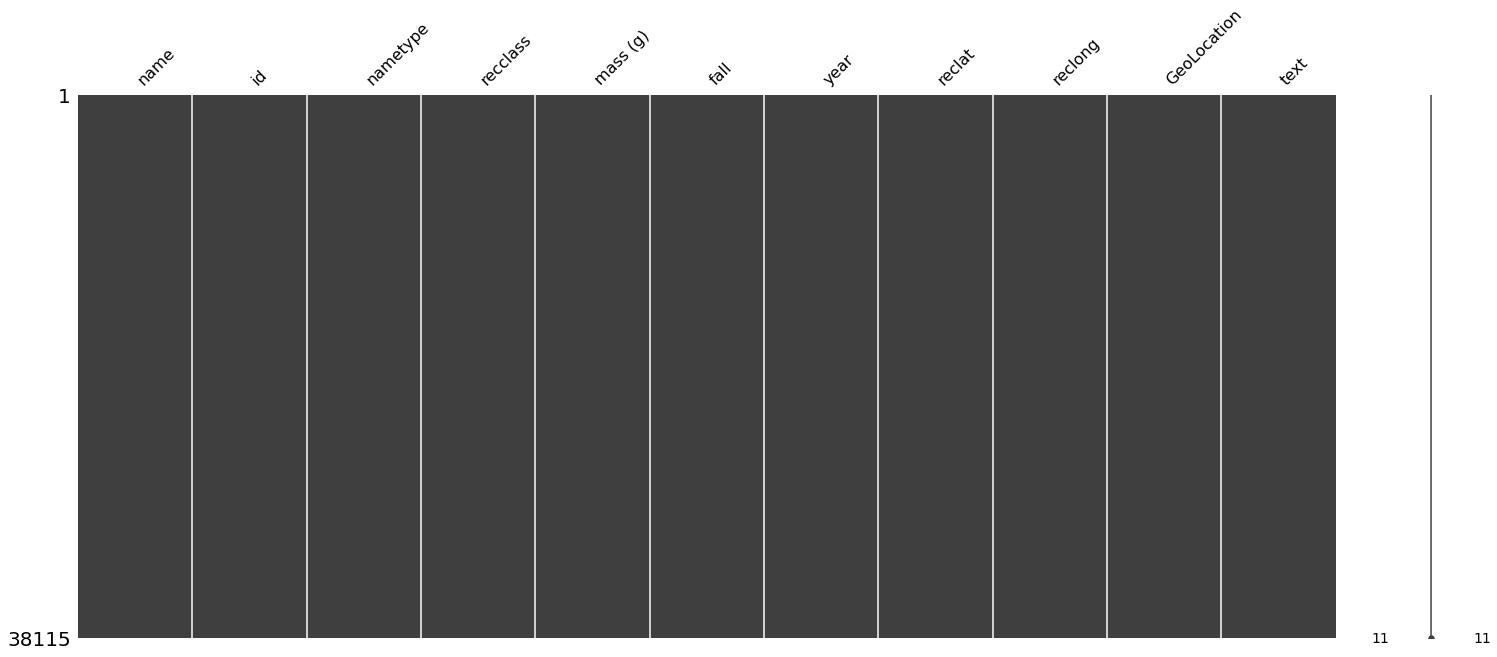

In [21]:
msno.matrix(df)

In [22]:
df['year'] = df['year'].astype(int)
df['year'] = df['year'].astype(str)

In [23]:
df.head()

name   id nametype     recclass  mass (g)  fall  year    reclat  \
0    Aachen    1    Valid           L5      21.0  Fell  1880  50.77500   
1    Aarhus    2    Valid           H6     720.0  Fell  1951  56.18333   
2      Abee    6    Valid          EH4  107000.0  Fell  1952  54.21667   
3  Acapulco   10    Valid  Acapulcoite    1914.0  Fell  1976  16.88333   
4   Achiras  370    Valid           L6     780.0  Fell  1902 -33.16667   

     reclong           GeoLocation  \
0    6.08333     (50.775, 6.08333)   
1   10.23333  (56.18333, 10.23333)   
2 -113.00000    (54.21667, -113.0)   
3  -99.90000     (16.88333, -99.9)   
4  -64.95000   (-33.16667, -64.95)   

                                                text  
0     Name: Aachen; Mass of meteorite in grams: 21.0  
1    Name: Aarhus; Mass of meteorite in grams: 720.0  
2   Name: Abee; Mass of meteorite in grams: 107000.0  
3  Name: Acapulco; Mass of meteorite in grams: 19...  
4   Name: Achiras; Mass of meteorite in grams: 780.0

In [24]:
df['text'] = 'Name: ' + df['name'] + '; Mass of meteorite in grams: ' + df['mass (g)'].astype(str) + '; Year: ' + df['year']

In [25]:
df.head()

name   id nametype     recclass  mass (g)  fall  year    reclat  \
0    Aachen    1    Valid           L5      21.0  Fell  1880  50.77500   
1    Aarhus    2    Valid           H6     720.0  Fell  1951  56.18333   
2      Abee    6    Valid          EH4  107000.0  Fell  1952  54.21667   
3  Acapulco   10    Valid  Acapulcoite    1914.0  Fell  1976  16.88333   
4   Achiras  370    Valid           L6     780.0  Fell  1902 -33.16667   

     reclong           GeoLocation  \
0    6.08333     (50.775, 6.08333)   
1   10.23333  (56.18333, 10.23333)   
2 -113.00000    (54.21667, -113.0)   
3  -99.90000     (16.88333, -99.9)   
4  -64.95000   (-33.16667, -64.95)   

                                                text  
0  Name: Aachen; Mass of meteorite in grams: 21.0...  
1  Name: Aarhus; Mass of meteorite in grams: 720....  
2  Name: Abee; Mass of meteorite in grams: 107000...  
3  Name: Acapulco; Mass of meteorite in grams: 19...  
4  Name: Achiras; Mass of meteorite in grams: 780...

In [26]:
df.text[0]

'Name: Aachen; Mass of meteorite in grams: 21.0; Year: 1880'

In [27]:
#Converting grams to kg
df['mass (kg)'] = df['mass (g)']/1000

In [28]:
#Boolean column for top 0.1% meteorites in terms of mass
df['top 0.1% mass'] = df['mass (g)']>=np.percentile(df['mass (g)'], 99.9)

In [29]:
df['year'] = df['year'].replace('2101', '2011')

In [30]:
df.head()

name   id nametype     recclass  mass (g)  fall  year    reclat  \
0    Aachen    1    Valid           L5      21.0  Fell  1880  50.77500   
1    Aarhus    2    Valid           H6     720.0  Fell  1951  56.18333   
2      Abee    6    Valid          EH4  107000.0  Fell  1952  54.21667   
3  Acapulco   10    Valid  Acapulcoite    1914.0  Fell  1976  16.88333   
4   Achiras  370    Valid           L6     780.0  Fell  1902 -33.16667   

     reclong           GeoLocation  \
0    6.08333     (50.775, 6.08333)   
1   10.23333  (56.18333, 10.23333)   
2 -113.00000    (54.21667, -113.0)   
3  -99.90000     (16.88333, -99.9)   
4  -64.95000   (-33.16667, -64.95)   

                                                text  mass (kg)  top 0.1% mass  
0  Name: Aachen; Mass of meteorite in grams: 21.0...      0.021          False  
1  Name: Aarhus; Mass of meteorite in grams: 720....      0.720          False  
2  Name: Abee; Mass of meteorite in grams: 107000...    107.000          False  
3  Name: Acapulco; Mass of meteorite in grams: 19...      1.914          False  
4  Name: Achiras; Mass of meteorite in grams: 780...      0.780          False

In [31]:
df['text'] = 'Name: ' + df['name'] + '; Mass of meteorite in kg: ' + df['mass (kg)'].astype(str) + '; Year: ' + df['year']

In [32]:
df.to_csv("meteorites_new")